In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('dataset.csv')
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


In [4]:
df.shape

(43778, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

Animal         0
Age            0
Temperature    0
Symptom 1      0
Symptom 2      0
Symptom 3      0
Disease        0
dtype: int64

In [7]:
label_encoders={}
categorical_cols=['Animal','Symptom 1','Symptom 2','Symptom 3','Disease']

for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [8]:
X=df.drop('Disease',axis=1)
Y=df['Disease']

In [9]:
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,1,3,103.1,7,12,11,4
1,0,13,104.5,12,11,7,3
2,3,1,100.5,7,12,11,3
3,1,14,100.3,11,21,6,1
4,3,2,103.6,12,11,7,4


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [11]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [12]:
Y_pred=model.predict(X_test)

In [13]:
print("\nAccuracy Score:",accuracy_score(Y_test,Y_pred))
print("\nClassification Report:\n",classification_report(Y_test,Y_pred))


Accuracy Score: 0.7777523983554134

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      1.00      1.00      1963
           2       1.00      1.00      1.00      1963
           3       0.32      0.30      0.31      1443
           4       0.32      0.34      0.33      1415

    accuracy                           0.78      8756
   macro avg       0.73      0.73      0.73      8756
weighted avg       0.78      0.78      0.78      8756



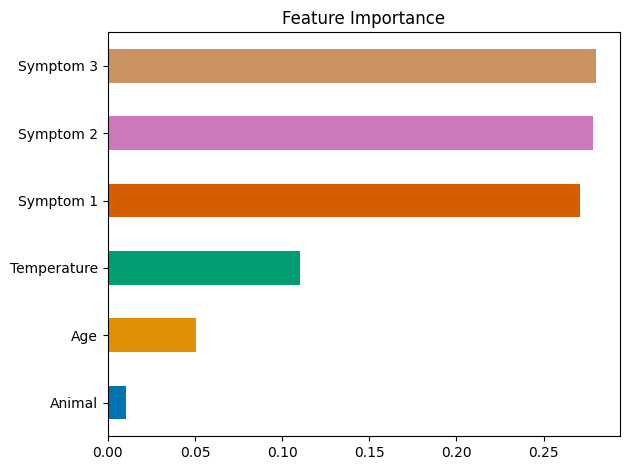

In [14]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values()

colors = sns.color_palette("colorblind", len(feature_importance_sorted))

# Plot with colorblind-safe colors
feature_importance_sorted.plot(
    kind='barh',
    color=colors,
    title='Feature Importance'
)

plt.tight_layout()
plt.show()


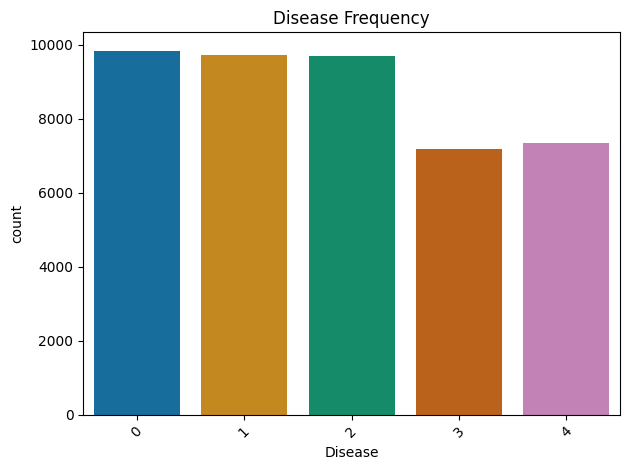

In [15]:
# Count Plot of Disease Case(Visualize how many animals are affected by each disease)

sns.countplot(x='Disease', hue='Disease', data=df, palette='colorblind', legend=False)
plt.title('Disease Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

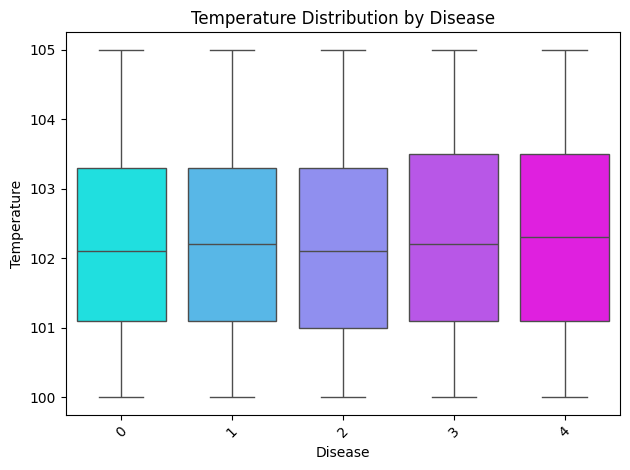

In [16]:
# Boxplot- Temperature vs Disease

sns.boxplot(x='Disease', hue='Disease', y='Temperature',data=df, palette='cool', legend=False)
plt.title('Temperature Distribution by Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

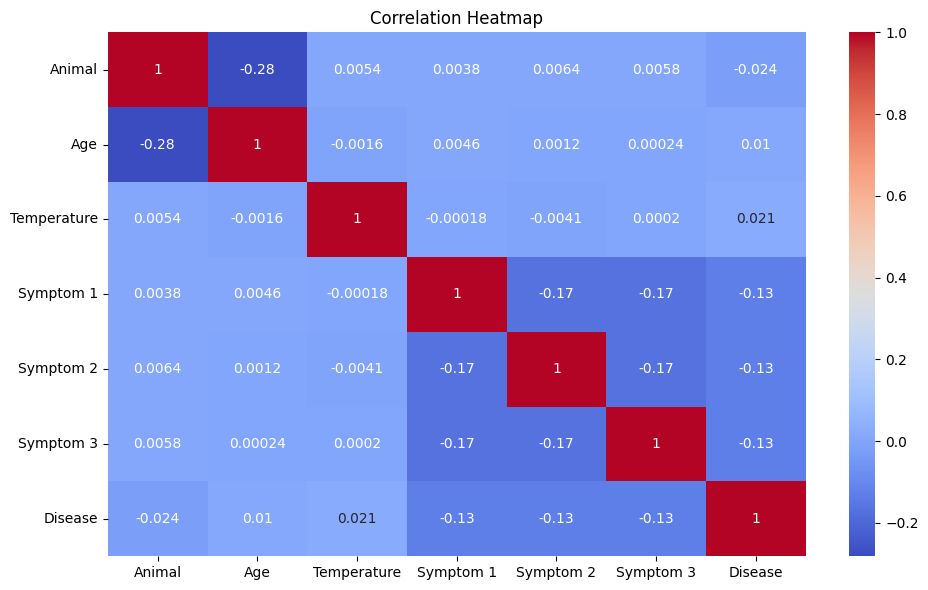

In [17]:
# Heatmap-Feature Correlation(relationships b/w all numerical features and encoded symptoms)

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

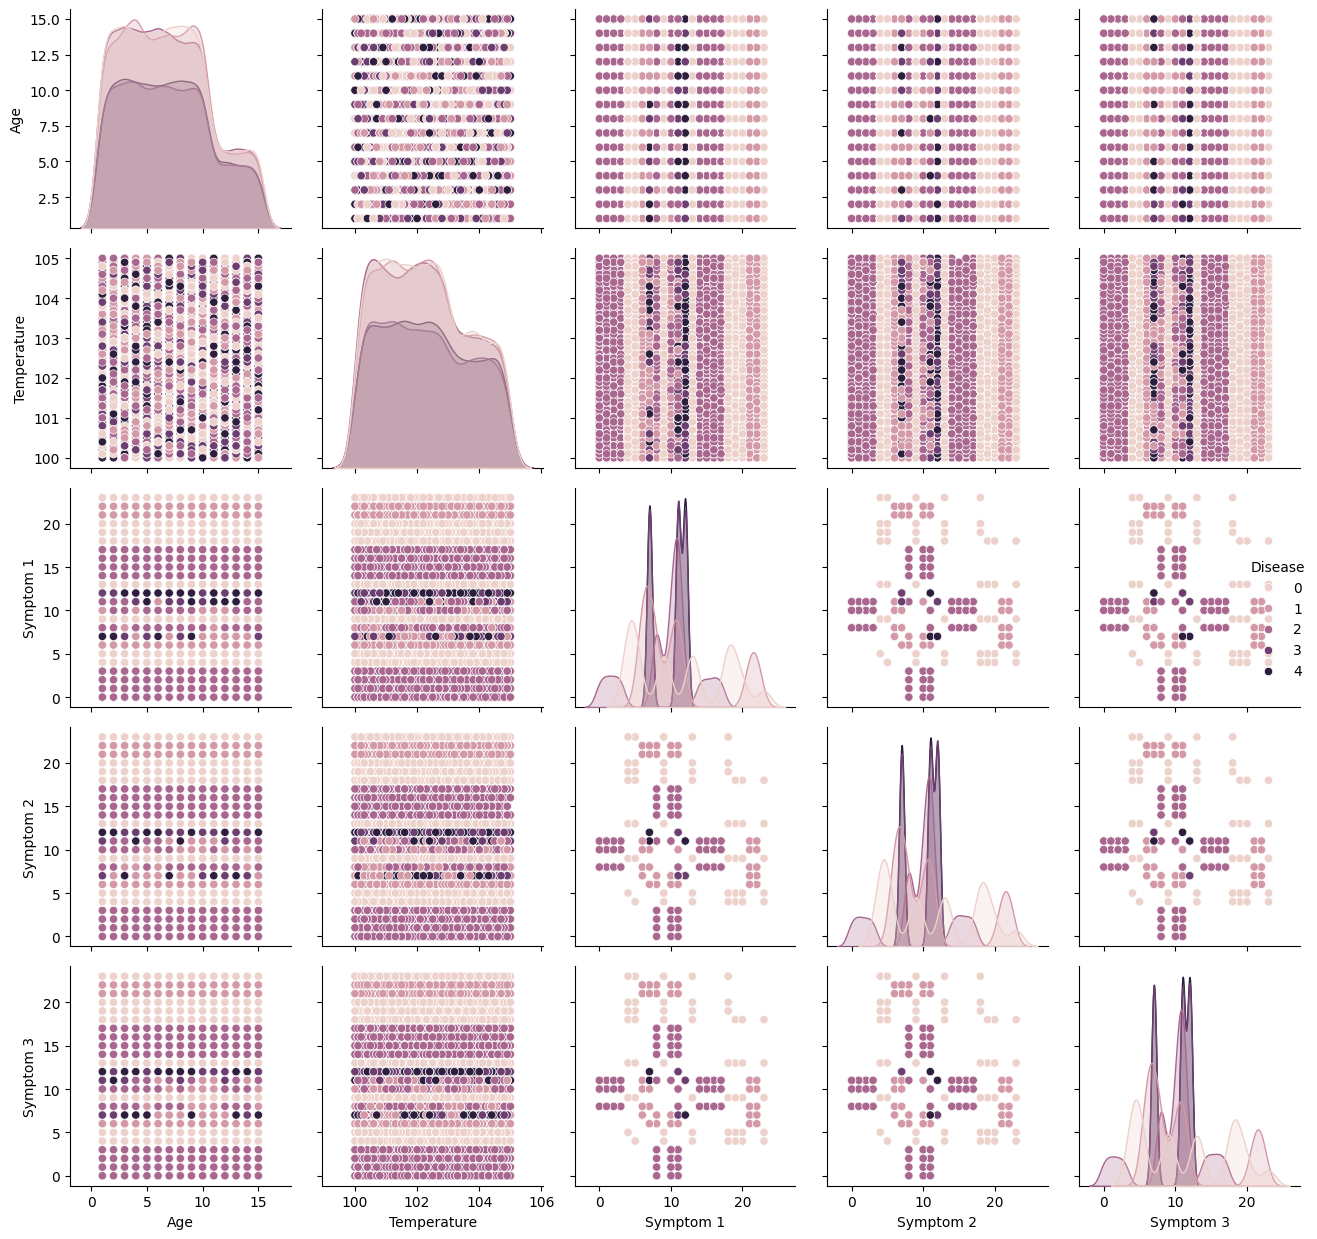

In [18]:
# Pair Plot - Scatters matrix between kry features(visualize clusters and class separation)

sns.pairplot(df[['Age','Temperature','Symptom 1','Symptom 2', 'Symptom 3','Disease']],hue='Disease')
plt.tight_layout()
plt.show()